In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


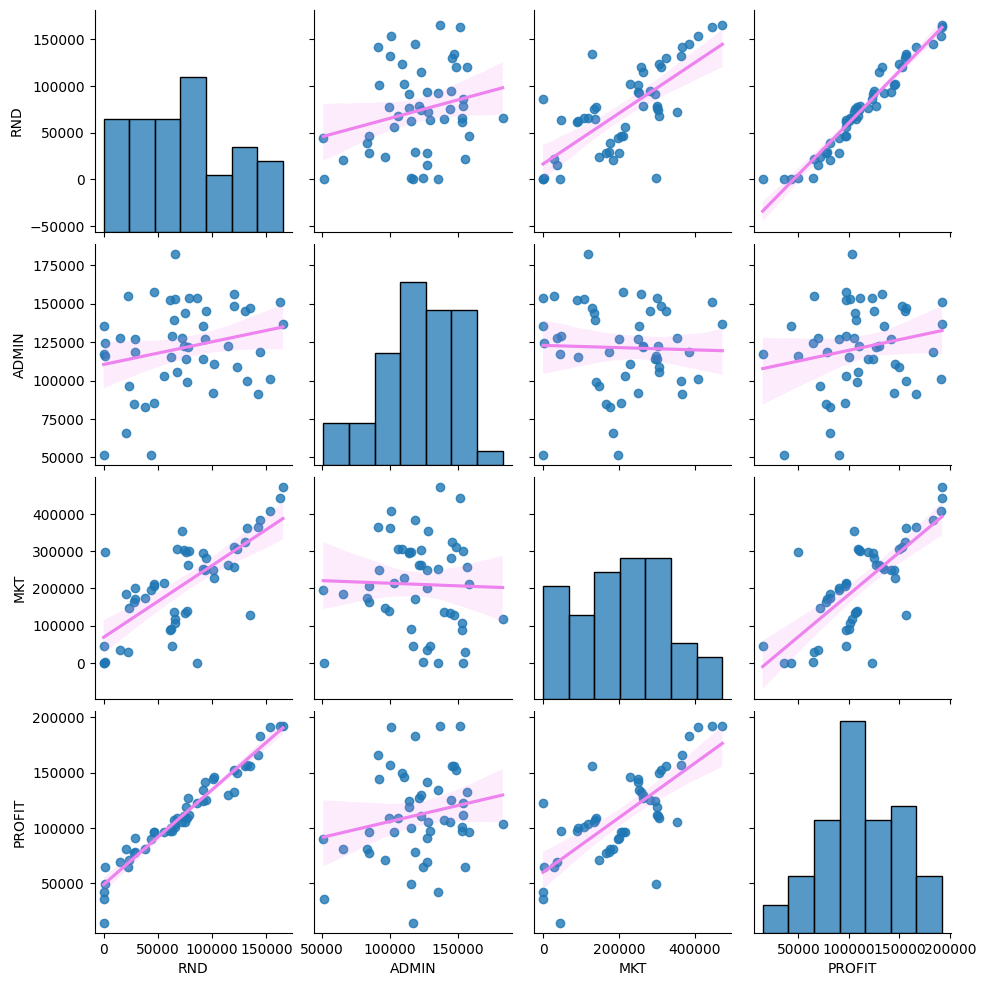

In [5]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws" :{"color":"violet"}})



In [6]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

3) X & Y

In [10]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [11]:
x = df.drop(columns=["PROFIT","STATE"])

y = df[["PROFIT"]]

In [12]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [13]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


5) MLR model

In [15]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()

m.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
m.intercept_

array([50122.19298987])

In [17]:
m.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [19]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [20]:
coef = pd.Series(m.coef_.flatten(), index=x.columns)
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

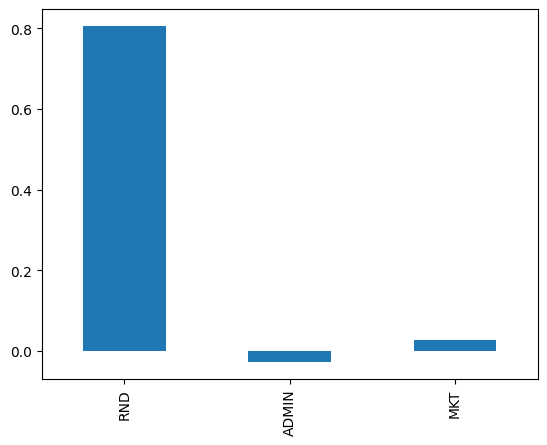

In [23]:
coef.plot(kind="bar")

6. Model Eval

In [25]:
from sklearn.metrics import(
    root_mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)

def eval(m,x,y):
    ypred = m.predict(x)
    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)
    
    print(f"rmse = {rmse:.2f}")
    print(f"mae = {mae:.2f}")
    print(f"mape = {mape:.2%}")
    print(f"r2 = {r2:.2%}")
    
    
eval(m,x,y)

rmse = 8855.34
mae = 6471.45
mape = 10.60%
r2 = 95.07%


R2 is 95% model is good compare to SLR


Testing

In [27]:
rnd = 2_00_000
admin = 10_000
mkt = 1_00_000
xn = [[rnd,admin,mkt]]
prf_prd = m.predict(xn)
prf_prd

array([[213719.84976915]])